# Designining a pipeline and training the model on the pipeline(linear Regression)
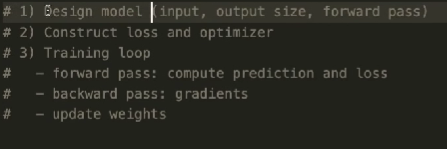

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

**Prepare data**

In [9]:
x_num,y_num = datasets.make_regression(n_samples=150,n_features=1,noise=10,random_state=1)


In [10]:
x=torch.from_numpy(x_num.astype(np.float32))
y=torch.from_numpy(y_num.astype(np.float32))

In [11]:
#reshapping
y=y.view(y.shape[0],1)
print(y)


tensor([[-11.3565],
        [ 39.3946],
        [ -3.9247],
        [ 86.0385],
        [-62.8195],
        [-64.0849],
        [-44.9856],
        [-13.5192],
        [ 74.7219],
        [ -2.4838],
        [ -2.2577],
        [ 16.8720],
        [ 25.9611],
        [-26.0738],
        [ 34.6977],
        [ 19.5054],
        [ 30.8904],
        [  4.7461],
        [ 47.4493],
        [-12.6753],
        [-32.5807],
        [  1.5501],
        [  7.7896],
        [ 58.8296],
        [  3.9530],
        [ 56.9605],
        [ 15.0405],
        [ 40.5906],
        [  7.6583],
        [ 35.7090],
        [  4.3505],
        [ 63.8572],
        [-48.0866],
        [ 41.1800],
        [ 27.2909],
        [ 36.8287],
        [ 30.0650],
        [ 16.0677],
        [-65.1030],
        [-32.1724],
        [ 22.9603],
        [-61.8648],
        [ 29.1939],
        [-33.4875],
        [  4.1072],
        [ 12.5254],
        [ 25.0420],
        [  7.1839],
        [ 34.9547],
        [  1.9269],


In [12]:
n_samples,n_features=x.shape


In [13]:
#model
input_size=n_features
output_size =1
model=nn.Linear(input_size,output_size)

crt = nn.MSELoss()

opt=torch.optim.SGD(model.parameters(),lr=0.01)


n_epochs =100

for i in range(n_epochs):
    #forwards
    y_pred=model(x)

    loss=crt(y_pred,y)
    loss.backward()

    opt.step()

    #empty gradients
    opt.zero_grad()

    if (i+1)%5==0:
        print(f'epoch :{i+1},loss={loss.item():.3f}')









epoch :5,loss=1037.425
epoch :10,loss=898.119
epoch :15,loss=779.487
epoch :20,loss=678.428
epoch :25,loss=592.311
epoch :30,loss=518.906
epoch :35,loss=456.317
epoch :40,loss=402.936
epoch :45,loss=357.396
epoch :50,loss=318.536
epoch :55,loss=285.367
epoch :60,loss=257.049
epoch :65,loss=232.868
epoch :70,loss=212.214
epoch :75,loss=194.570
epoch :80,loss=179.493
epoch :85,loss=166.609
epoch :90,loss=155.595
epoch :95,loss=146.179
epoch :100,loss=138.128


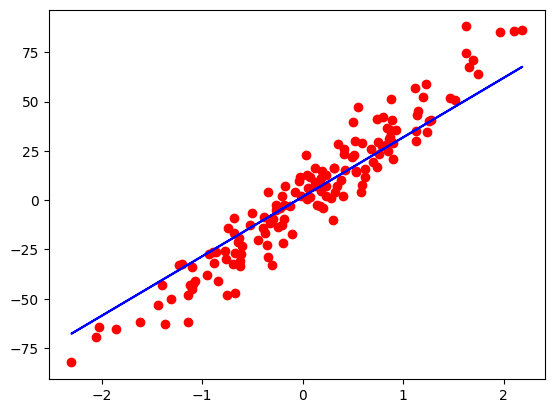

In [14]:
#plotting
predicted = model(x).detach().numpy()

plt.plot(x_num,y_num,'ro')
plt.plot(x_num,predicted,'b')
